In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the cleaned data
df = pd.read_excel("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/data_cleaned.xls")
# first rows of the DataFrame
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,repayment_status_sept,repayment_status_aug,repayment_status_july,repayment_status_june,repayment_status_may,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
4,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0


In [3]:
# Convert 'SEX', 'EDUCATION', and 'MARRIAGE' to categorical variables
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['default'] = df['default'].astype('category')
# Displaying the updated DataFrame with categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   LIMIT_BAL               13784 non-null  int64   
 1   SEX                     13784 non-null  category
 2   EDUCATION               13784 non-null  category
 3   MARRIAGE                13784 non-null  category
 4   AGE                     13784 non-null  int64   
 5   repayment_status_sept   13784 non-null  int64   
 6   repayment_status_aug    13784 non-null  int64   
 7   repayment_status_july   13784 non-null  int64   
 8   repayment_status_june   13784 non-null  int64   
 9   repayment_status_may    13784 non-null  int64   
 10  repayment_status_april  13784 non-null  int64   
 11  bill_sept               13784 non-null  int64   
 12  bill_aug                13784 non-null  int64   
 13  bill_july               13784 non-null  int64   
 14  bill_june             

In [4]:
df1=df.copy()

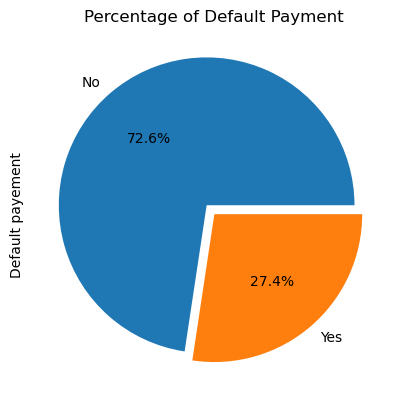

In [5]:
#Percentage of default payement
df1['default'].value_counts().plot(kind='pie',explode=[0.08,0],autopct='%1.1f%%',labels=['No', 'Yes'])
plt.title('Percentage of Default Payment')
plt.ylabel('Default payement')
plt.show()

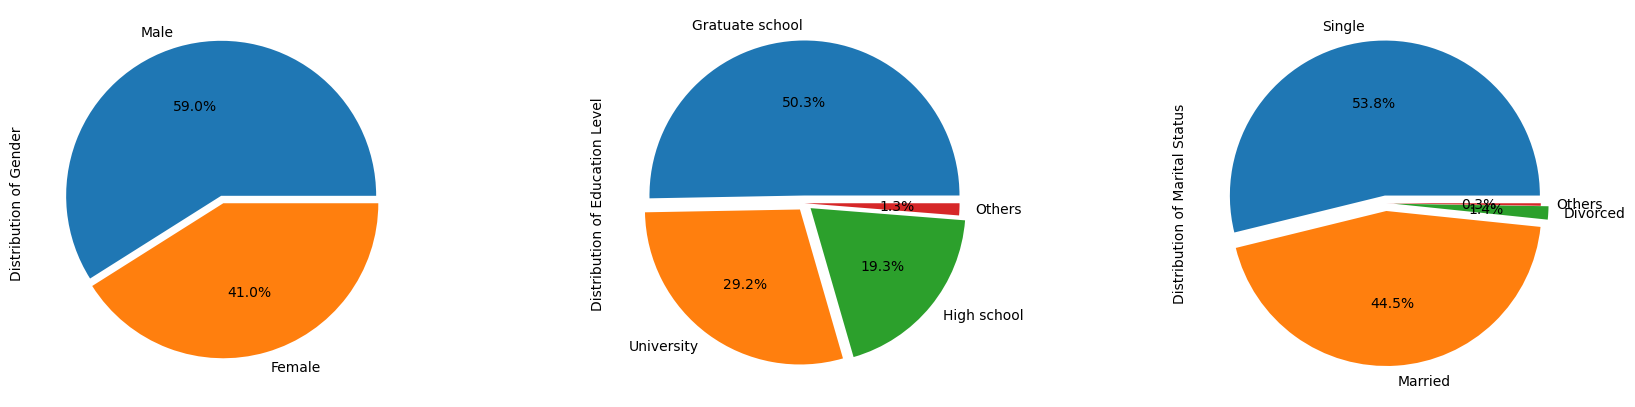

In [6]:
Sex=df1['SEX'].map({1: 'Male', 2: 'Female'})
Education=df1['EDUCATION'].map({0: 'Others', 1: 'Graduate School', 2: 'University', 3: 'High School'})
Marriage=df1['MARRIAGE'].map({0: 'Others', 1: 'Married', 2: 'Single', 3: 'Divorced'})

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plotting pie chart for 'SEX'
Sex.value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', labels=['Male', 'Female'], ax=axes[0])
axes[0].set_ylabel('Distribution of Gender')

# Plotting pie chart for 'EDUCATION'
Education.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0],labels=['Gratuate school', 'University','High school','Others'], ax=axes[1])
axes[1].set_ylabel('Distribution of Education Level')

# Plotting pie chart for 'MARRIAGE'
Marriage.value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0.05, 0.05, 0.05, 0], ax=axes[2])
axes[2].set_ylabel('Distribution of Marital Status')


plt.subplots_adjust(wspace=0.5)
plt.show()


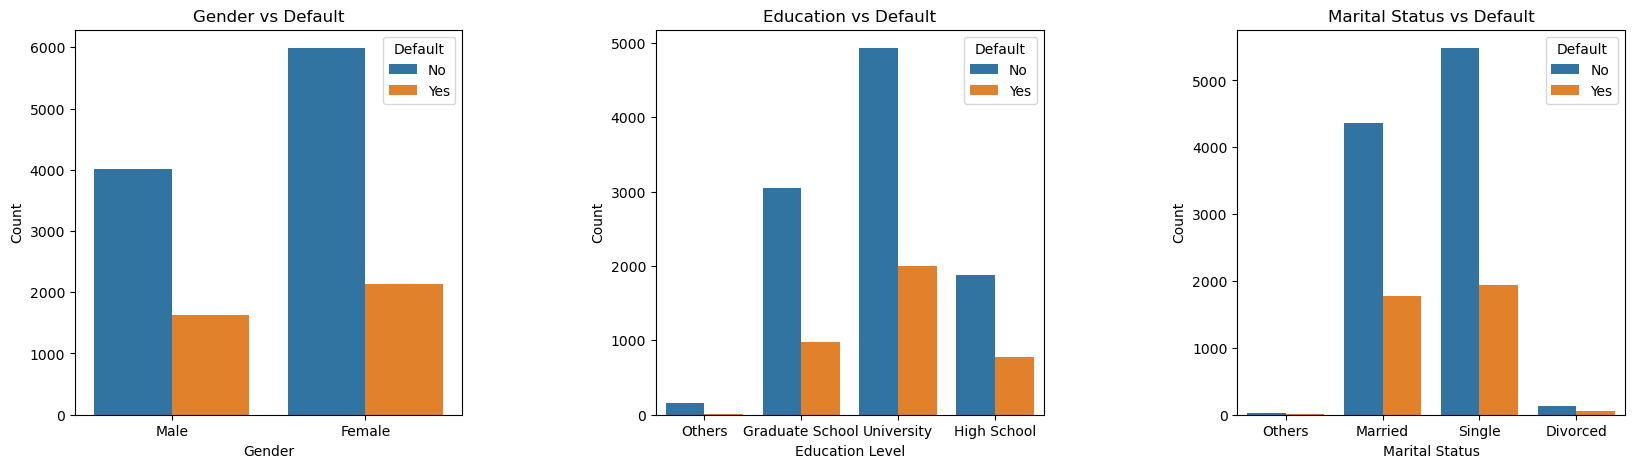

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plotting bar chart for 'SEX' and 'default'
sns.countplot(x=Sex, hue='default', data=df1, ax=axes[0])
axes[0].set_title('Gender vs Default')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].legend(title='Default', labels=['No', 'Yes'])

# Plotting bar chart for 'EDUCATION' and 'default'
sns.countplot(x=Education, hue='default', data=df1, ax=axes[1])
axes[1].set_title('Education vs Default')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].legend(title='Default', labels=['No', 'Yes']) 

# Plotting bar chart for 'MARRIAGE' and 'default'
sns.countplot(x=Marriage, hue='default', data=df1, ax=axes[2])
axes[2].set_title('Marital Status vs Default')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')
axes[2].legend(title='Default', labels=['No', 'Yes'])


plt.subplots_adjust(wspace=0.5)
plt.show()

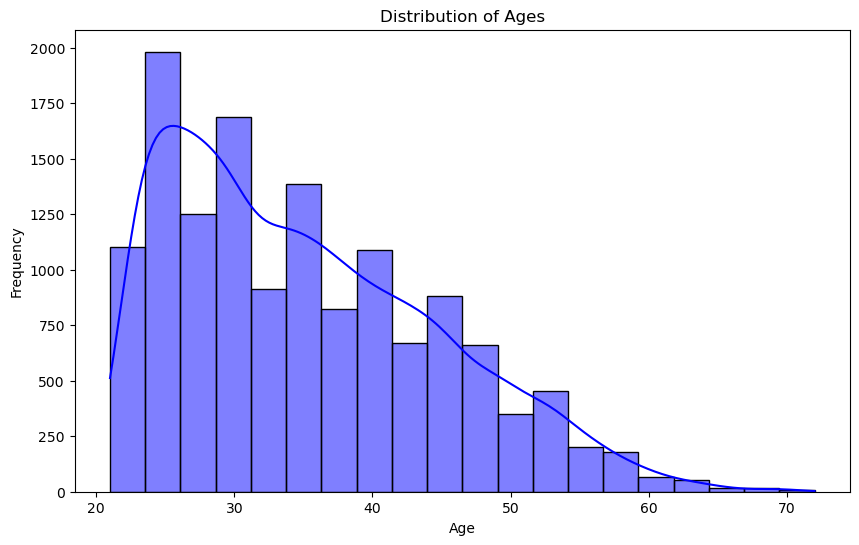

In [8]:
# Plot a histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

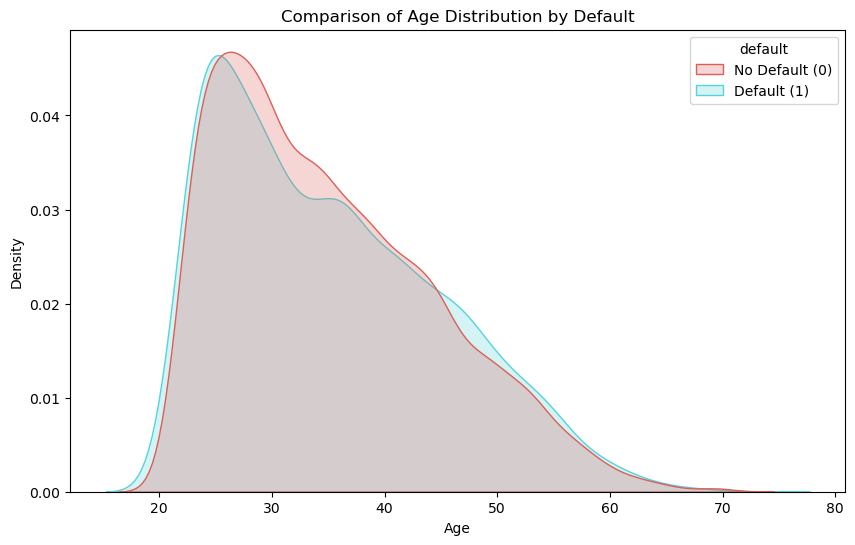

In [9]:
# Plot KDE plot for ages by default category
plt.figure(figsize=(10, 6))
_=sns.kdeplot(data=df1, x='AGE', hue='default', fill=True, palette='hls', common_norm=False)

# Set labels and title
plt.title('Comparison of Age Distribution by Default')
plt.xlabel('Age')
plt.ylabel('Density')

_.legend_.texts[0].set_text('No Default (0)')
_.legend_.texts[1].set_text('Default (1)')

# Display the plot
plt.show()

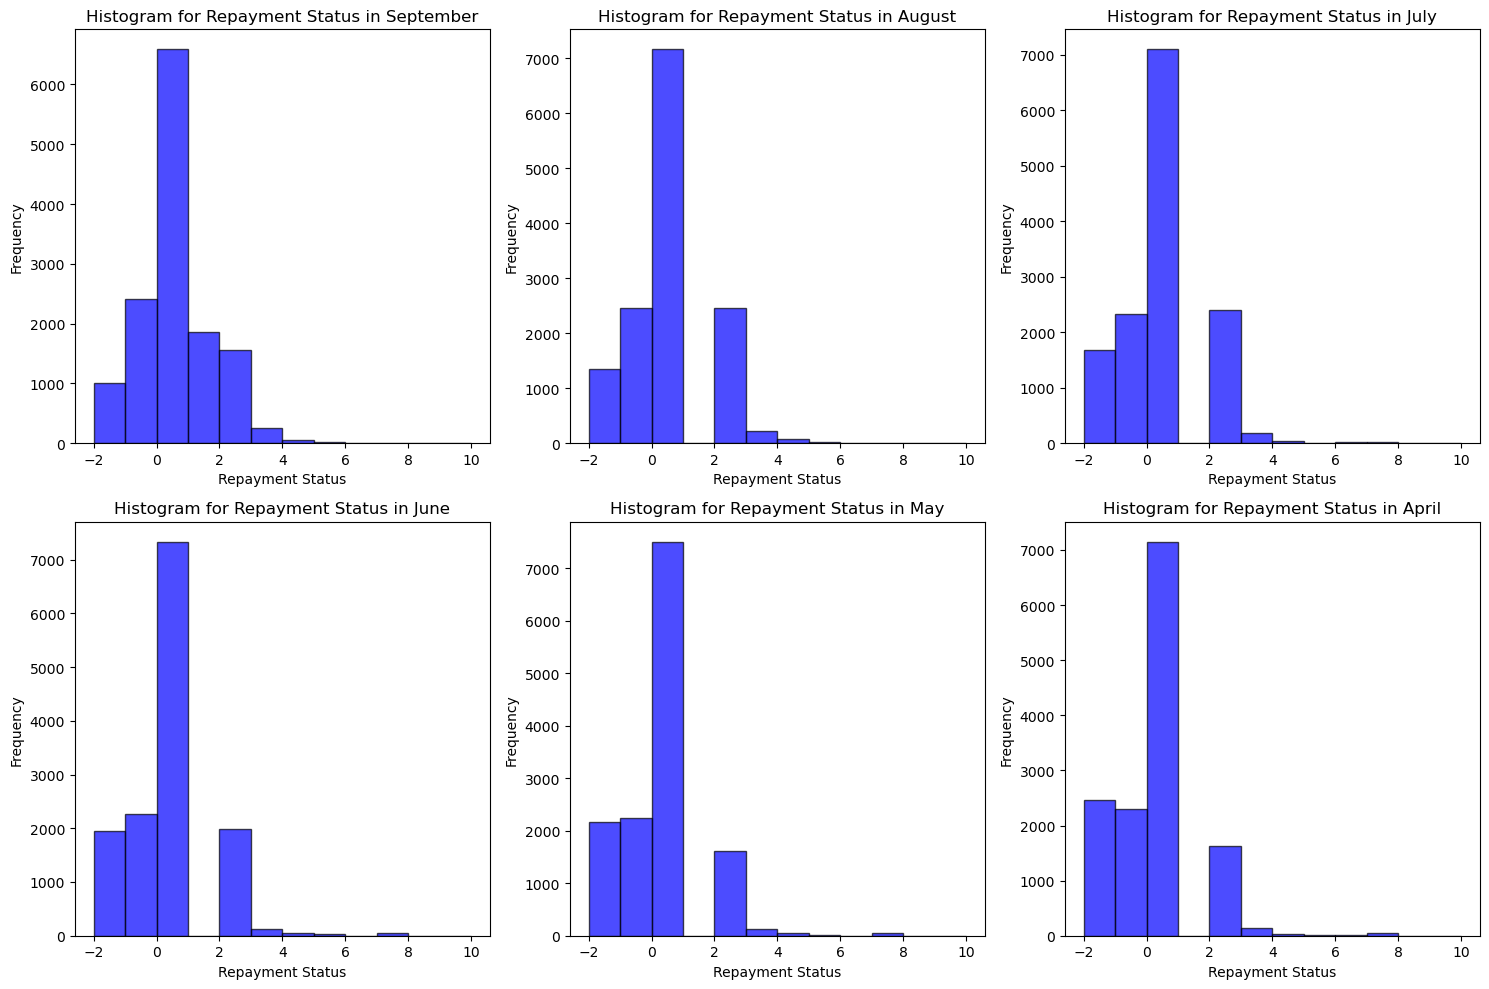

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each repayment status variable
axes[0].hist(df1['repayment_status_sept'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram for Repayment Status in September')
axes[0].set_xlabel('Repayment Status')
axes[0].set_ylabel('Frequency')

axes[1].hist(df1['repayment_status_aug'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title('Histogram for Repayment Status in August')
axes[1].set_xlabel('Repayment Status')
axes[1].set_ylabel('Frequency')

axes[2].hist(df1['repayment_status_july'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[2].set_title('Histogram for Repayment Status in July')
axes[2].set_xlabel('Repayment Status')
axes[2].set_ylabel('Frequency')

axes[3].hist(df1['repayment_status_june'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[3].set_title('Histogram for Repayment Status in June')
axes[3].set_xlabel('Repayment Status')
axes[3].set_ylabel('Frequency')

axes[4].hist(df1['repayment_status_may'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[4].set_title('Histogram for Repayment Status in May')
axes[4].set_xlabel('Repayment Status')
axes[4].set_ylabel('Frequency')

axes[5].hist(df1['repayment_status_april'], bins=range(-2, 11), color='blue', edgecolor='black', alpha=0.7)
axes[5].set_title('Histogram for Repayment Status in April')
axes[5].set_xlabel('Repayment Status')
axes[5].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


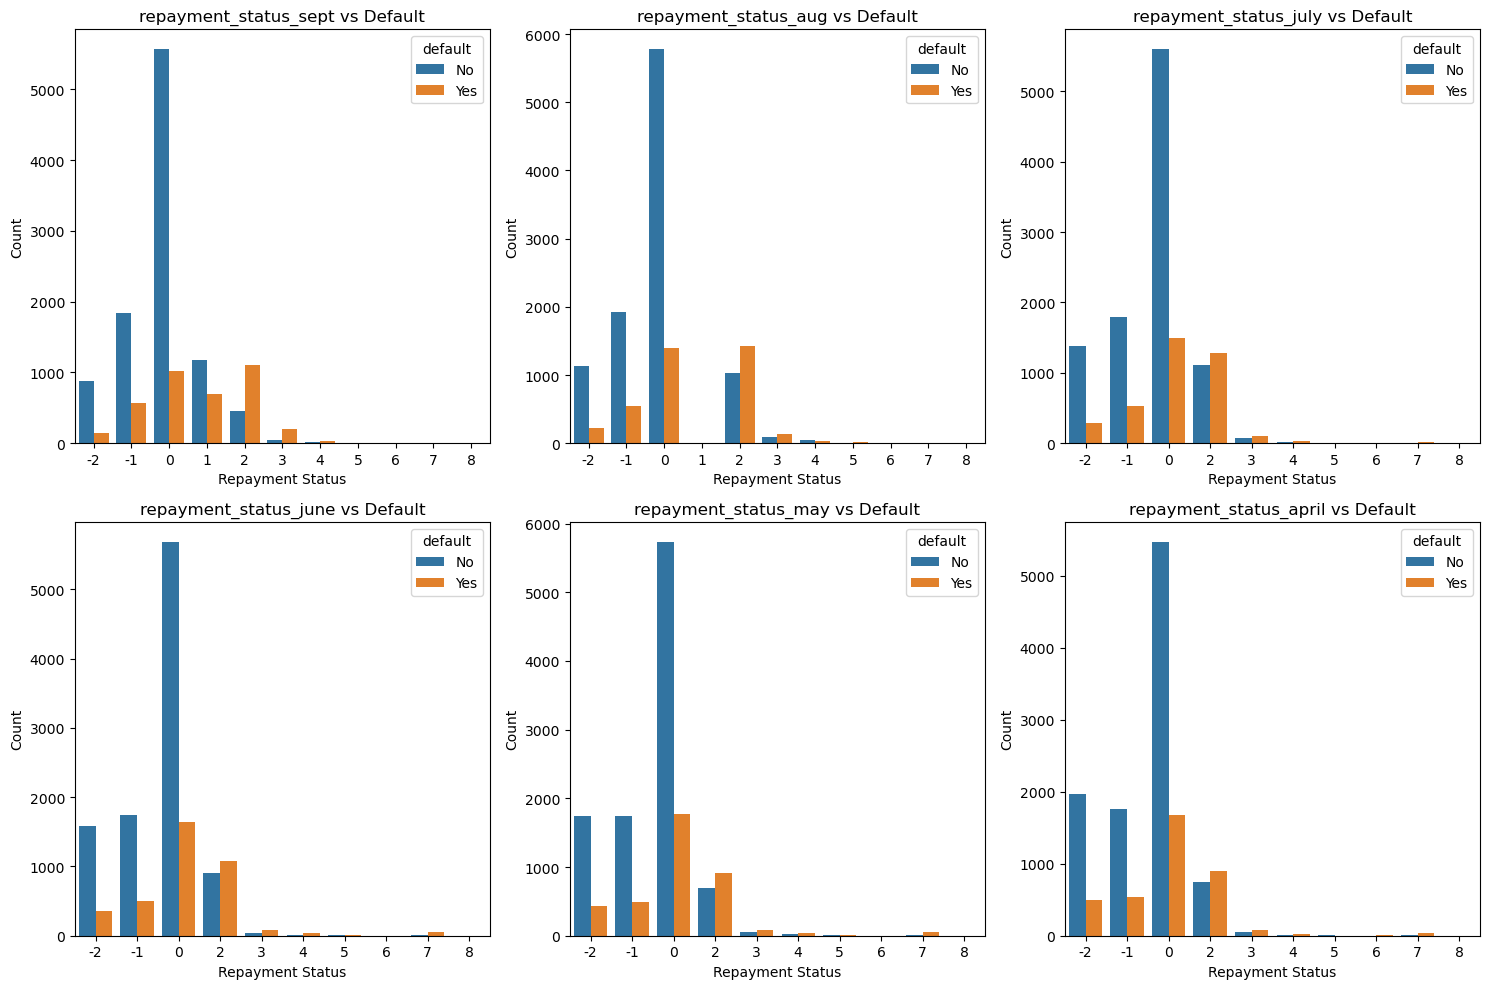

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot bar plots for each repayment status variable with respect to default
for i, col in enumerate(['repayment_status_sept', 'repayment_status_aug', 'repayment_status_july',
                         'repayment_status_june', 'repayment_status_may', 'repayment_status_april']):
    sns.countplot(x=col, hue='default', data=df1.replace({'default': {0: 'No', 1: 'Yes'}}), ax=axes[i])
    axes[i].set_title(f'{col} vs Default')
    axes[i].set_xlabel('Repayment Status')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

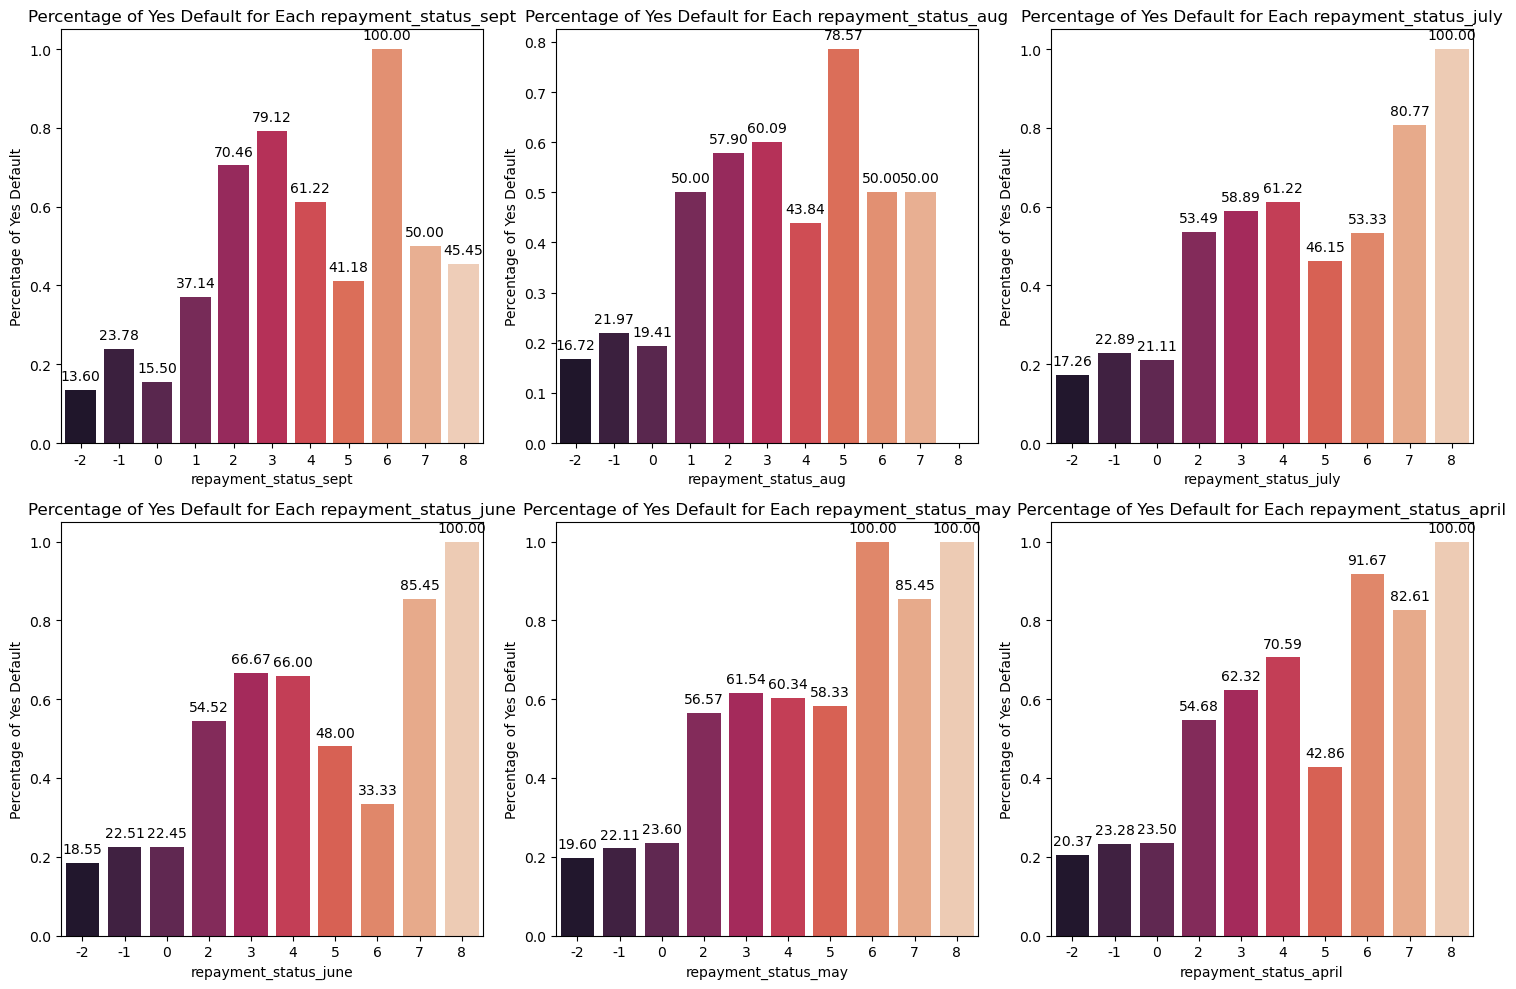

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

repayment_variables = ['repayment_status_sept', 'repayment_status_aug', 'repayment_status_july',
                        'repayment_status_june', 'repayment_status_may', 'repayment_status_april']

for i, variable in enumerate(repayment_variables):
    data = df1[df1['default'] == 1].groupby(variable).size() / df.groupby(variable).size()
    data = data.reset_index(name='Percentage')

    barplot = sns.barplot(x=variable, y='Percentage', data=data, palette='rocket', ax=axes.flatten()[i])

    for p in barplot.patches:
        barplot.annotate(f"{p.get_height()*100:.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    axes.flatten()[i].set_title(f'Percentage of Yes Default for Each {variable}')
    axes.flatten()[i].set_xlabel(variable)
    axes.flatten()[i].set_ylabel('Percentage of Yes Default')

plt.tight_layout()
plt.show()


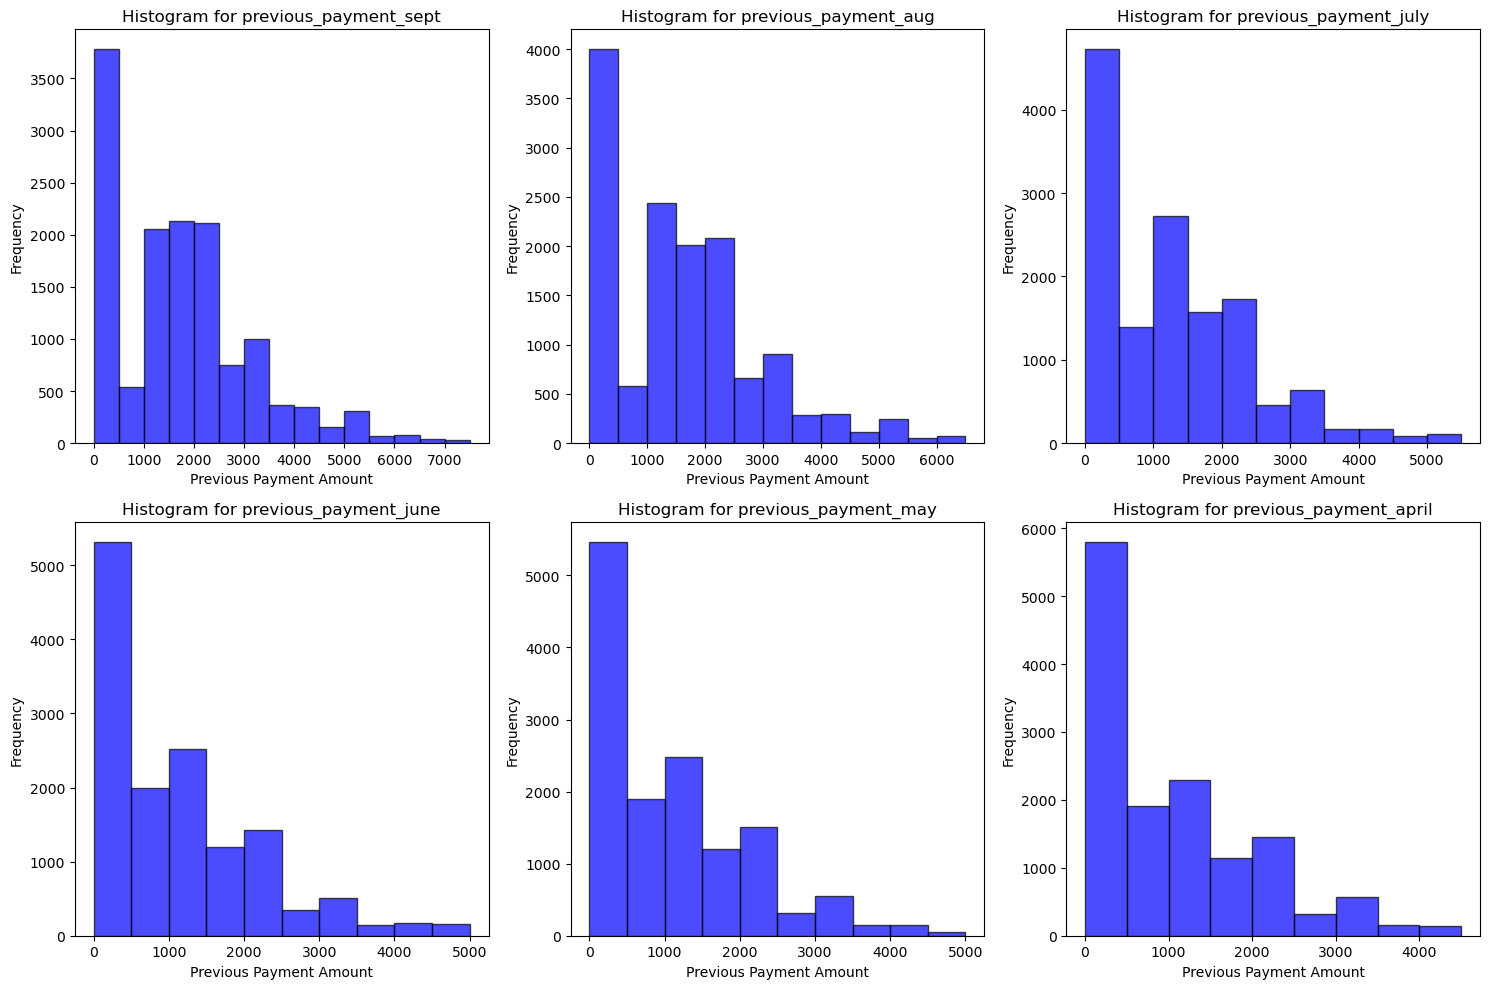

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

previous_payment_variables = ['previous_payment_sept', 'previous_payment_aug', 'previous_payment_july',
                               'previous_payment_june', 'previous_payment_may', 'previous_payment_april']

for i, variable in enumerate(previous_payment_variables):

    bins = range(min(df1[variable]), max(df1[variable]) + 500, 500)

    # Plot histogram for each previous_payment variable
    axes.flatten()[i].hist(df1[variable], bins=bins, color='blue', edgecolor='black', alpha=0.7)
    axes.flatten()[i].set_title(f'Histogram for {variable}')
    axes.flatten()[i].set_xlabel('Previous Payment Amount')
    axes.flatten()[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

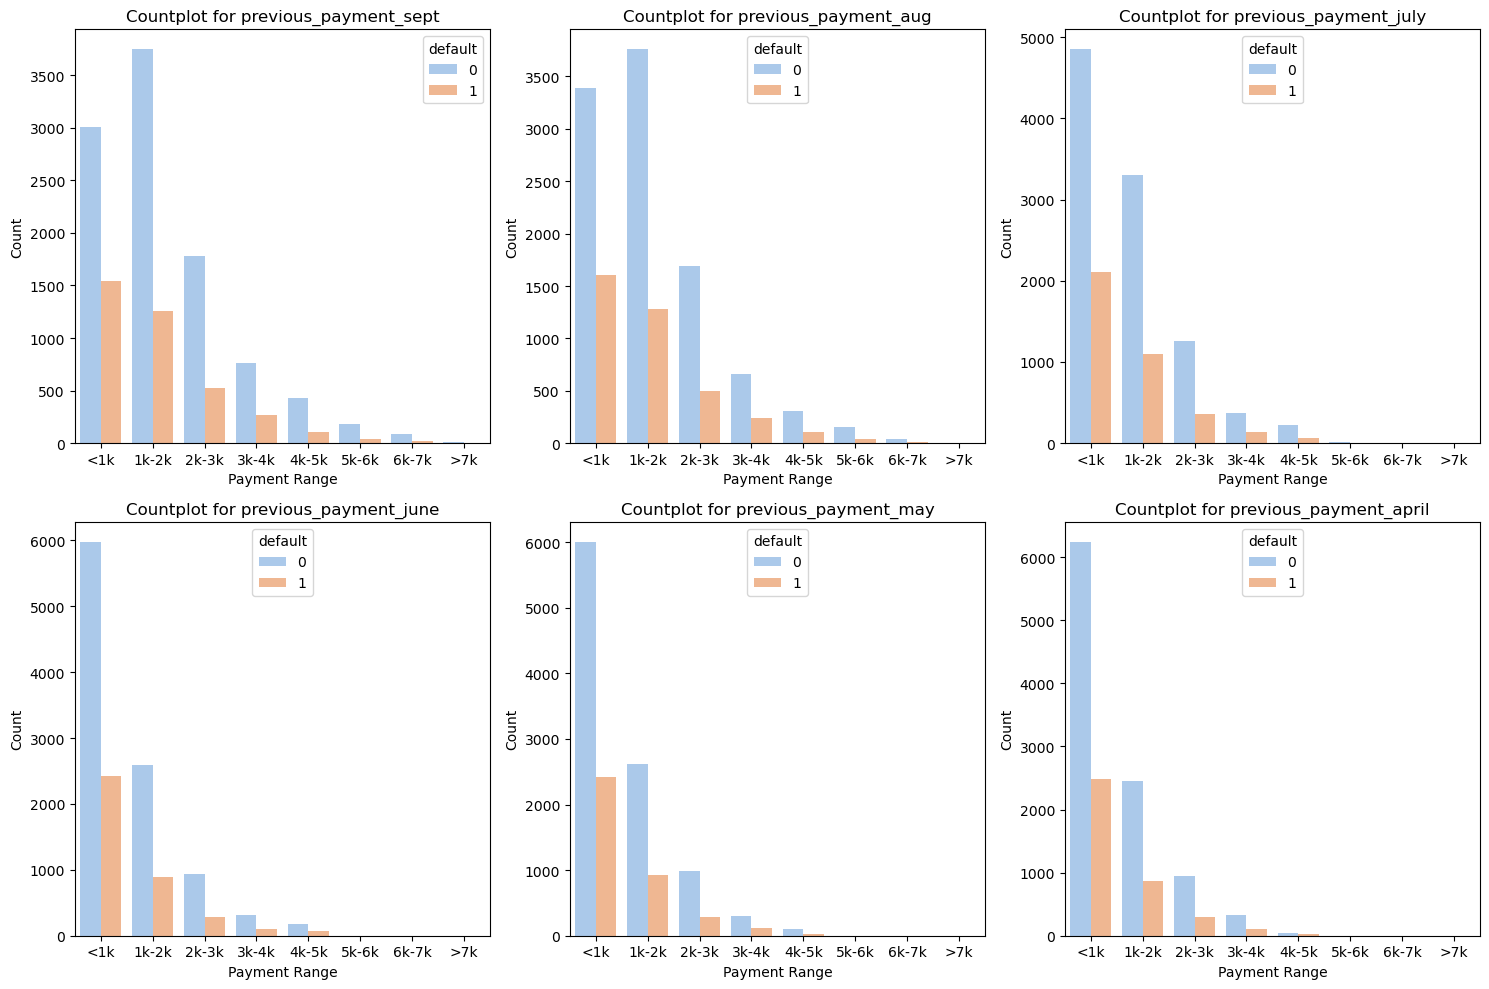

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

bins = [-float('inf'), 1000, 2000, 3000, 4000, 5000, 6000, 7000, float('inf')]
labels = ['<1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '>7k']

for i, variable in enumerate(previous_payment_variables):
    df1[f'payment_{variable[-3:]}'] = pd.cut(df1[variable], bins=bins, labels=labels, include_lowest=True)
    sns.countplot(x=f'payment_{variable[-3:]}', hue='default', data=df1, palette='pastel', ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Countplot for {variable}')
    axes.flatten()[i].set_xlabel('Payment Range')
    axes.flatten()[i].set_ylabel('Count')


plt.tight_layout()
plt.show()


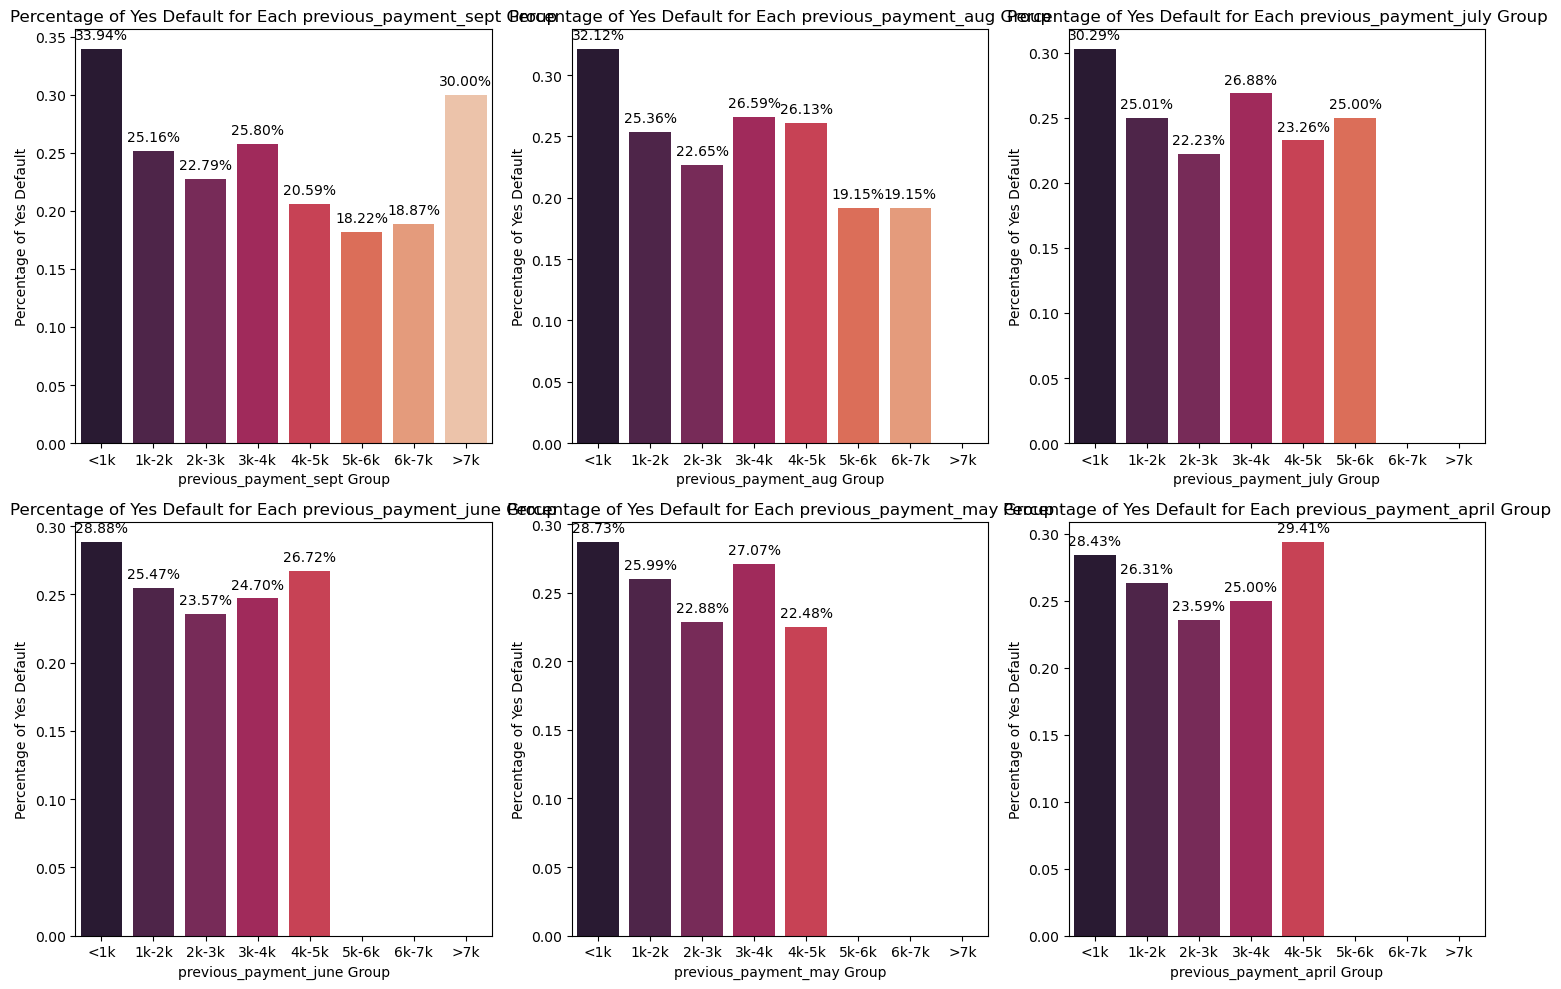

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, variable in enumerate(previous_payment_variables):
    df1[f'{variable}_group'] = pd.cut(df1[variable], bins=bins, labels=labels, include_lowest=True)
    data = df1[df1['default'] == 1].groupby(f'{variable}_group').size() / df1.groupby(f'{variable}_group').size()
    data = data.reset_index(name='Percentage')
    barplot = sns.barplot(x=f'{variable}_group', y='Percentage', data=data, palette='rocket', ax=axes.flatten()[i])

    for p in barplot.patches:
        barplot.annotate(f"{p.get_height()*100:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    axes.flatten()[i].set_title(f'Percentage of Yes Default for Each {variable} Group')
    axes.flatten()[i].set_xlabel(f'{variable} Group')
    axes.flatten()[i].set_ylabel('Percentage of Yes Default')


plt.tight_layout()
plt.show()


<Axes: >

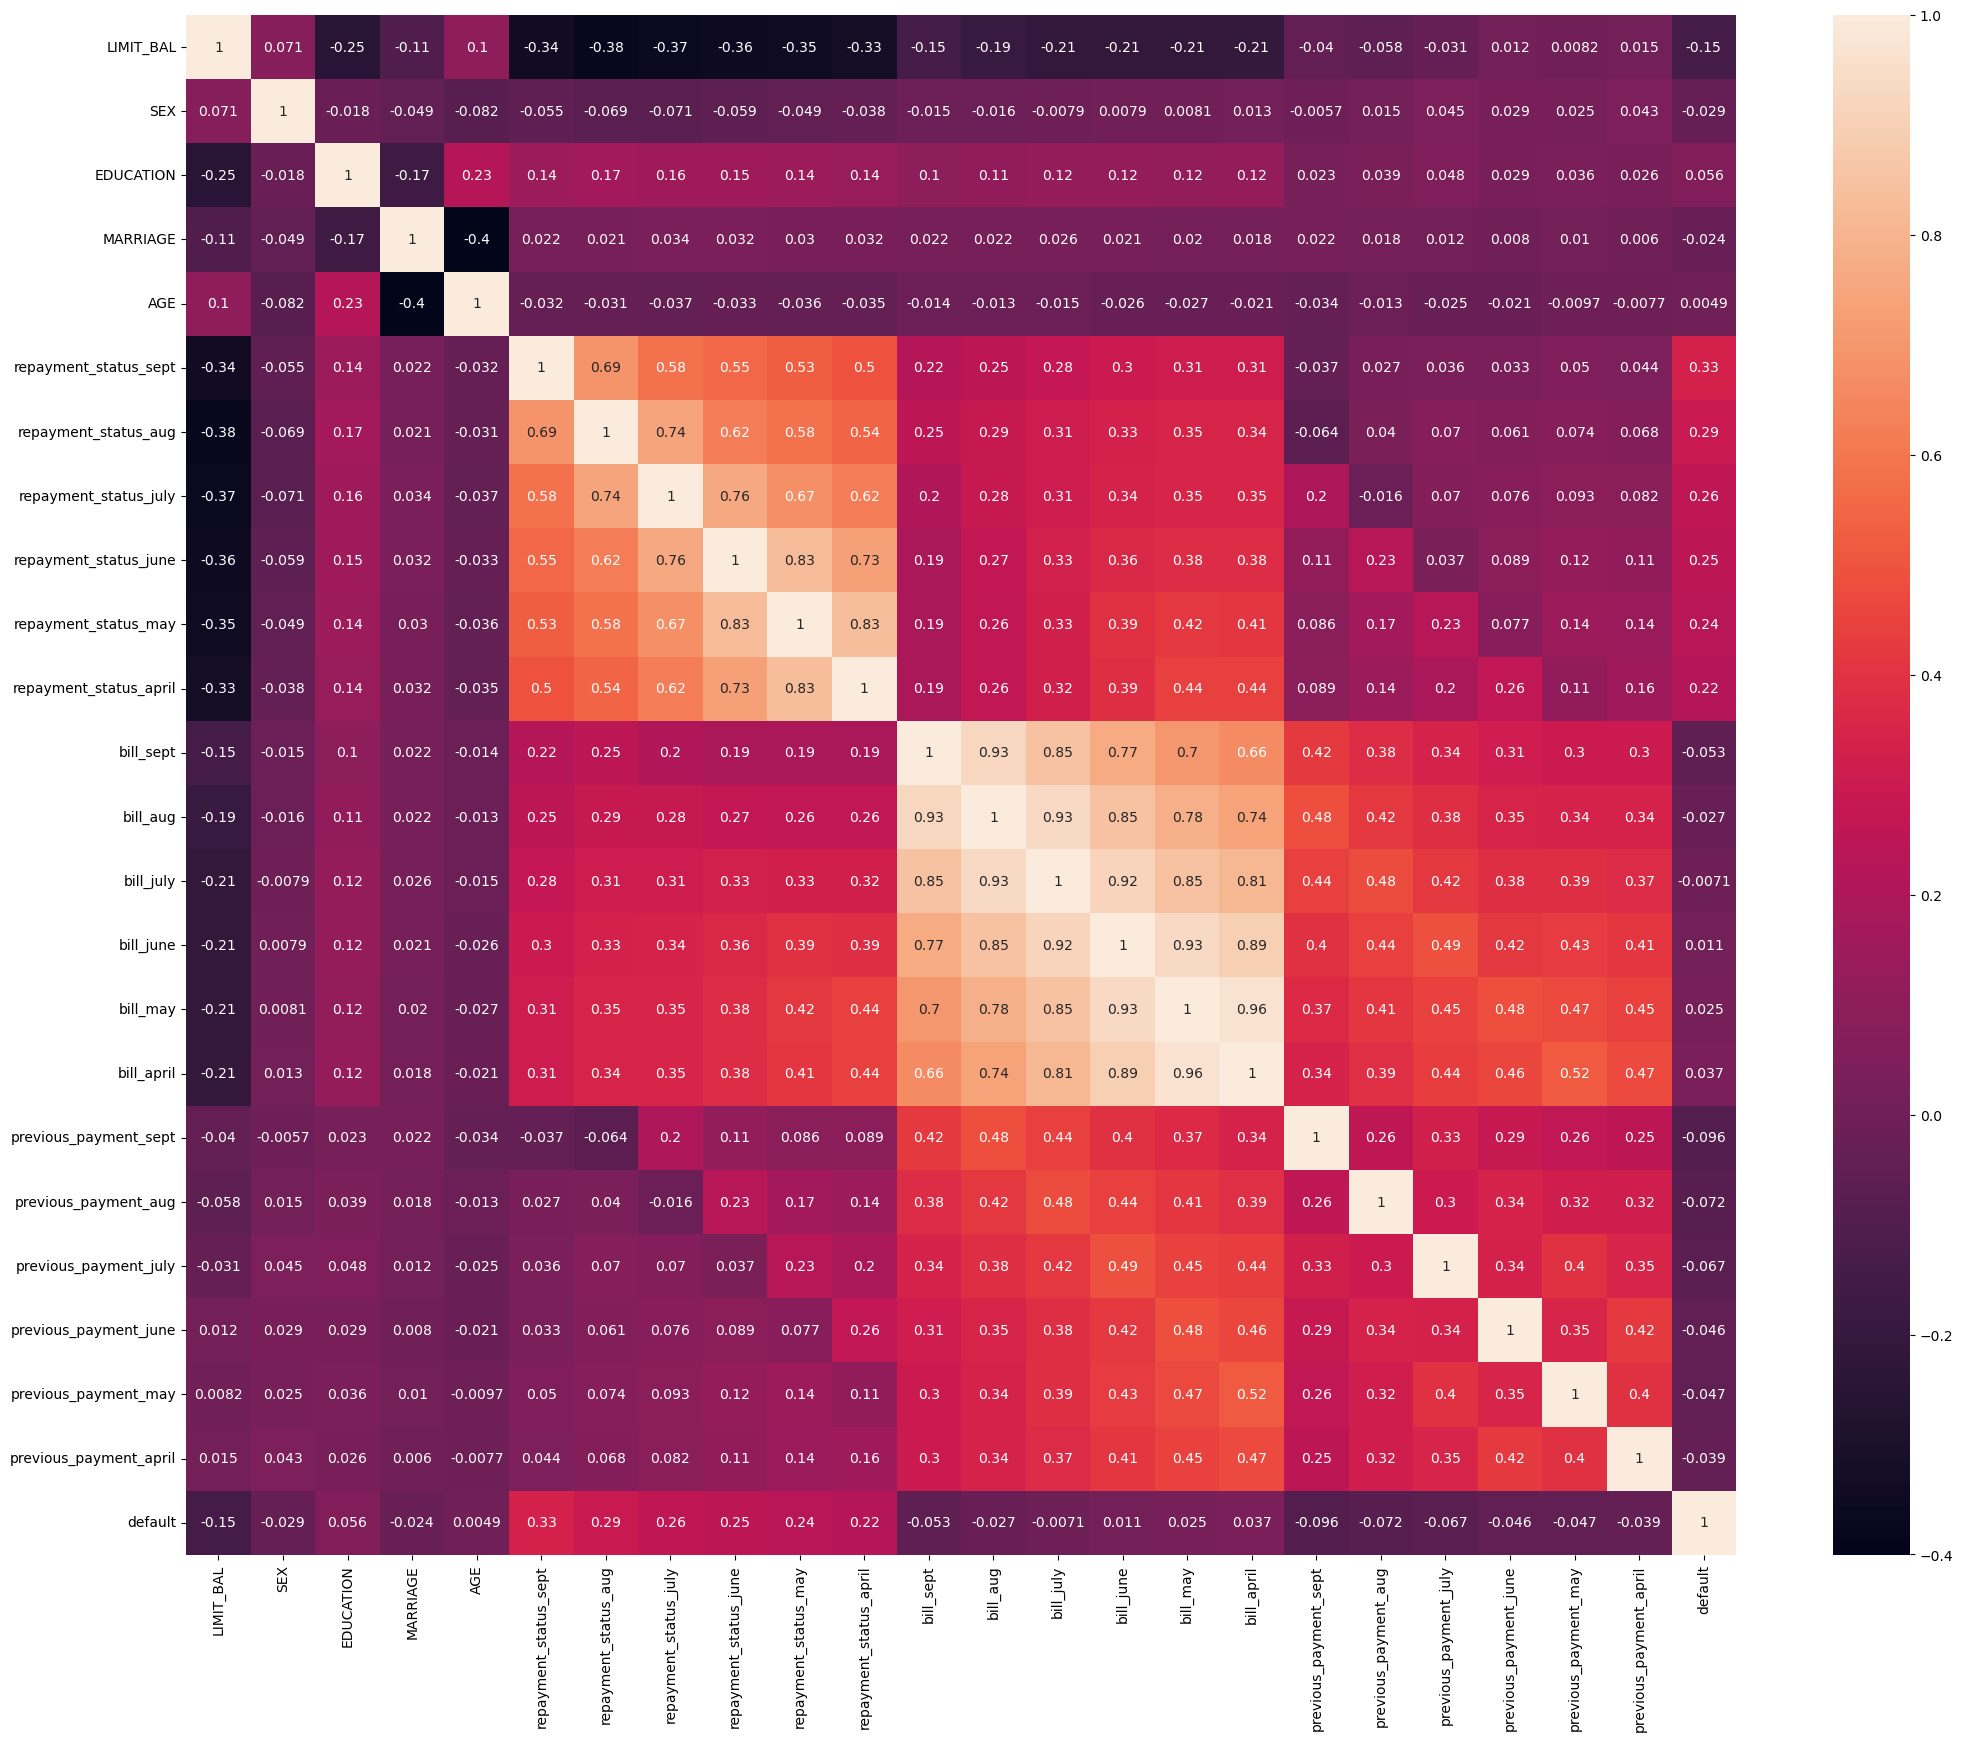

In [16]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)